# **Regression with an Insurance Dataset by FNNs**

In [1]:
# Importing essential libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization
import warnings  # For controlling warning messages

# Suppressing warnings to avoid clutter in output
warnings.filterwarnings('ignore')


## Importing dataset

In [2]:
# Reading the dataset from a CSV file
data = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv')  # Load the training data from the specified path

# Displaying the first few rows of the dataset for inspection
data.head()  # Show the first 5 rows of the dataframe

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Date  \
0         17.0         372.0                 5.0  2023-12-23 15:21:39.134960   
1         12.0         694.0                 2.0  2023-06-12 15:21:39.111551   
2         14.0           NaN                 3.0  2023-09-30 15:21:39.221386   
3          0.0         367.0                 1.0  2024-06-12 15:21:39.226954   
4          8.0         598.0                 4.0  2021-12-01 15:21:39.252145   

  Customer Feedback Smoking Status Exercise Frequency Property Type  \
0              Poor             No             Weekly         House   
1           Average            Yes            Monthly         House   
2              Good            Yes             Weekly         House   
3              Poor            Yes              Daily     Apartment   
4              Poor            Yes             Weekly         House   

  Premium Amount  
0         2869.0  
1         1483.0  
2          567.0  
3          765.0  
4         2022.0  

[5 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

## Beginnig of Preprocessing

In [4]:
# Dropping the 'id' column from the dataset as it's not needed for analysis
data.drop(columns=['id'], inplace=True)  # Remove the 'id' column in-place

# Displaying the first few rows of the modified dataset
data.head()  # Show the first 5 rows after the column removal

Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  19.0  Female        10049.0        Married                   1.0   
1  39.0  Female        31678.0       Divorced                   3.0   
2  23.0    Male        25602.0       Divorced                   3.0   
3  21.0    Male       141855.0        Married                   2.0   
4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium   
1        Master's            NaN     15.569731     Rural  Comprehensive   
2     High School  Self-Employed     47.177549  Suburban        Premium   
3      Bachelor's            NaN     10.938144     Rural          Basic   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0           NaN                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-12-23 15:21:39.134960              Poor             No   
1  2023-06-12 15:21:39.111551           Average            Yes   
2  2023-09-30 15:21:39.221386              Good            Yes   
3  2024-06-12 15:21:39.226954              Poor            Yes   
4  2021-12-01 15:21:39.252145              Poor            Yes   

  Exercise Frequency Property Type  Premium Amount  
0             Weekly         House          2869.0  
1            Monthly         House          1483.0  
2             Weekly         House           567.0  
3              Daily     Apartment           765.0  
4             Weekly         House          2022.0

In [5]:
# Checking for missing values in the dataset
data.isnull().sum()  # Returns the count of missing values for each column

Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [6]:
# Filling missing values in various columns with appropriate strategies
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill missing 'Age' with the median value
data['Annual Income'].fillna(data['Annual Income'].median(), inplace=True)  # Fill missing 'Annual Income' with the median value
data['Marital Status'].fillna('Unknown', inplace=True)  # Fill missing 'Marital Status' with 'Unknown'
data['Number of Dependents'].fillna(data['Number of Dependents'].median(), inplace=True)  # Fill missing 'Number of Dependents' with the median value
data['Occupation'].fillna('Unknown', inplace=True)  # Fill missing 'Occupation' with 'Unknown'
data['Health Score'].fillna(data['Health Score'].median(), inplace=True)  # Fill missing 'Health Score' with the median value
data['Previous Claims'].fillna(data['Previous Claims'].median(), inplace=True)  # Fill missing 'Previous Claims' with the median value
data['Vehicle Age'].fillna(data['Vehicle Age'].median(), inplace=True)  # Fill missing 'Vehicle Age' with the median value
data['Credit Score'].fillna(data['Credit Score'].median(), inplace=True)  # Fill missing 'Credit Score' with the median value
data['Customer Feedback'].fillna(data['Customer Feedback'].mode()[0], inplace=True)  # Fill missing 'Customer Feedback' with the mode (most frequent value)
data['Insurance Duration'].fillna(data['Insurance Duration'].mode()[0], inplace=True)  # Fill missing 'Insurance Duration' with the mode (most frequent value)
data['Premium Amount'].fillna(data['Premium Amount'].mean(), inplace=True)  # Fill missing 'Premium Amount' with the mean value

In [7]:
data.isnull().sum()

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [8]:
data.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  19.0  Female        10049.0        Married                   1.0   
1  39.0  Female        31678.0       Divorced                   3.0   
2  23.0    Male        25602.0       Divorced                   3.0   
3  21.0    Male       141855.0        Married                   2.0   
4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium   
1        Master's        Unknown     15.569731     Rural  Comprehensive   
2     High School  Self-Employed     47.177549  Suburban        Premium   
3      Bachelor's        Unknown     10.938144     Rural          Basic   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0         595.0                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-12-23 15:21:39.134960              Poor             No   
1  2023-06-12 15:21:39.111551           Average            Yes   
2  2023-09-30 15:21:39.221386              Good            Yes   
3  2024-06-12 15:21:39.226954              Poor            Yes   
4  2021-12-01 15:21:39.252145              Poor            Yes   

  Exercise Frequency Property Type  Premium Amount  
0             Weekly         House          2869.0  
1            Monthly         House          1483.0  
2             Weekly         House           567.0  
3              Daily     Apartment           765.0  
4             Weekly         House          2022.0

In [14]:
# Displaying the number of unique values for each categorical column
for col in data.select_dtypes(include=['object']).columns:  # Loop through all columns with object (string) data type
    print(f'{col}: {data[col].nunique()}')  # Print the column name and the number of unique values in that column

Policy Start Date: 167381


In [15]:
# Importing LabelEncoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Gender', 'Marital Status', 'Education Level',
                     'Occupation', 'Location', 'Policy Type', 'Customer Feedback',
                     'Smoking Status', 'Exercise Frequency', 'Property Type']

# Looping through each column and applying label encoding
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])  # Encoding the categorical values into numerical labels

# Displaying the first few rows of the dataset after encoding
data.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0  19.0       0        10049.0               1                   1.0   
1  39.0       0        31678.0               0                   3.0   
2  23.0       1        25602.0               0                   3.0   
3  21.0       1       141855.0               1                   2.0   
4  21.0       1        39651.0               2                   1.0   

   Education Level  Occupation  Health Score  Location  Policy Type  \
0                0           1     22.598761         2            2   
1                2           3     15.569731         0            1   
2                1           1     47.177549         1            2   
3                0           3     10.938144         0            0   
4                0           1     20.376094         0            2   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0         595.0                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

            Policy Start Date  Customer Feedback  Smoking Status  \
0  2023-12-23 15:21:39.134960                  2               0   
1  2023-06-12 15:21:39.111551                  0               1   
2  2023-09-30 15:21:39.221386                  1               1   
3  2024-06-12 15:21:39.226954                  2               1   
4  2021-12-01 15:21:39.252145                  2               1   

   Exercise Frequency  Property Type  Premium Amount  
0                   3              2          2869.0  
1                   1              2          1483.0  
2                   3              2           567.0  
3                   0              0           765.0  
4                   3              2          2022.0

## Splitting & Scaling

In [16]:
# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['Premium Amount'])  # Features: All columns except 'Premium Amount'
y = data['Premium Amount']  # Target: 'Premium Amount' column (what we want to predict)

In [17]:
# Converting 'Policy Start Date' to datetime format, coercing errors to NaT (Not a Time)
X['Policy Start Date'] = pd.to_datetime(X['Policy Start Date'], errors='coerce')  # Ensure proper datetime conversion

# Extracting individual date-time features from the 'Policy Start Date' column
X['Policy Start Year'] = X['Policy Start Date'].dt.year  # Extract the year
X['Policy Start Month'] = X['Policy Start Date'].dt.month  # Extract the month

# Drop the original 'Policy Start Date' column as it's no longer needed
X = X.drop(columns=['Policy Start Date'])  # Remove the original date column
X.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0  19.0       0        10049.0               1                   1.0   
1  39.0       0        31678.0               0                   3.0   
2  23.0       1        25602.0               0                   3.0   
3  21.0       1       141855.0               1                   2.0   
4  21.0       1        39651.0               2                   1.0   

   Education Level  Occupation  Health Score  Location  Policy Type  \
0                0           1     22.598761         2            2   
1                2           3     15.569731         0            1   
2                1           1     47.177549         1            2   
3                0           3     10.938144         0            0   
4                0           1     20.376094         0            2   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0         595.0                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

   Customer Feedback  Smoking Status  Exercise Frequency  Property Type  \
0                  2               0                   3              2   
1                  0               1                   1              2   
2                  1               1                   3              2   
3                  2               1                   0              0   
4                  2               1                   3              2   

   Policy Start Year  Policy Start Month  
0               2023                  12  
1               2023                   6  
2               2023                   9  
3               2024                   6  
4               2021                  12

In [18]:
# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# List of columns to scale (standardize)
columns_to_scale = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
                    'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Year', 'Policy Start Month', ]

# Applying standardization to the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])  # Scaling the features to have mean=0 and variance=1

# Displaying the first few rows after scaling
X.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0 -1.648301       0      -0.707414               1             -0.746862   
1 -0.159542       0      -0.023289               0              0.733500   
2 -1.350549       1      -0.215473               0              0.733500   
3 -1.499425       1       3.461605               1             -0.006681   
4 -1.499425       1       0.228896               2             -0.746862   

   Education Level  Occupation  Health Score  Location  Policy Type  \
0                0           1     -0.249610         2            2   
1                2           3     -0.844110         0            1   
2                1           1      1.829212         1            2   
3                0           3     -1.235840         0            0   
4                0           1     -0.437598         0            2   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0     1.286338     -1.567375           -0.007024   
1              1.0     0.420713      0.714630           -1.163391   
2              1.0     0.766963      0.013020           -0.777935   
3              1.0    -1.656788     -1.602810           -1.548847   
4              0.0    -0.271787      0.034281           -0.392480   

   Customer Feedback  Smoking Status  Exercise Frequency  Property Type  \
0                  2               0                   3              2   
1                  0               1                   1              2   
2                  1               1                   3              2   
3                  2               1                   0              0   
4                  2               1                   3              2   

   Policy Start Year  Policy Start Month  
0           0.934365            1.604378  
1           0.934365           -0.143523  
2           0.934365            0.730427  
3           1.611868           -0.143523  
4          -0.420641            1.604378

## Dealing with outliers

In [19]:
# List of numerical columns for analysis or model training
numerical_cols = [
    'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
    'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
    'Policy Start Month', 'Policy Start Year'
]

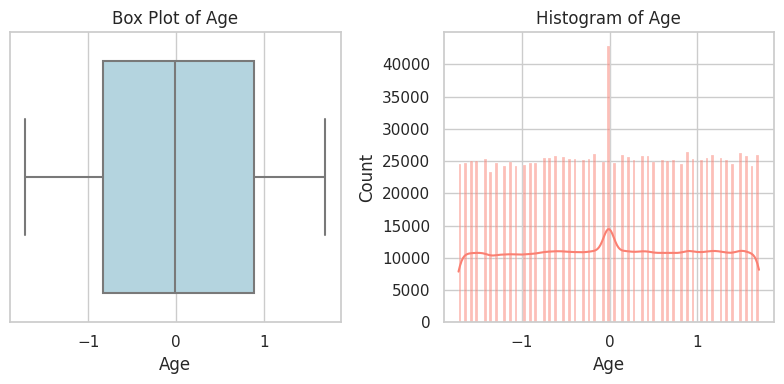

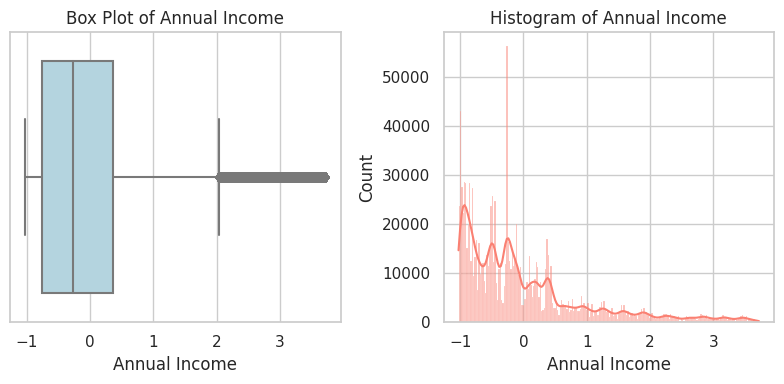

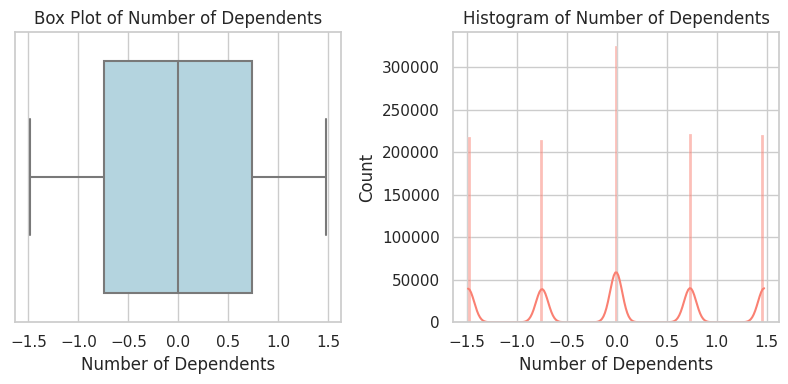

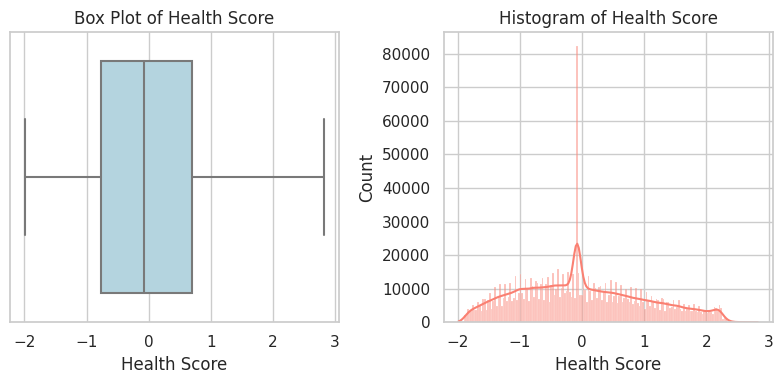

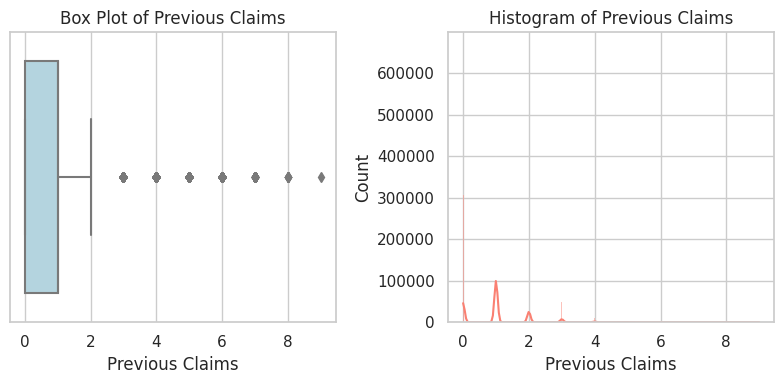

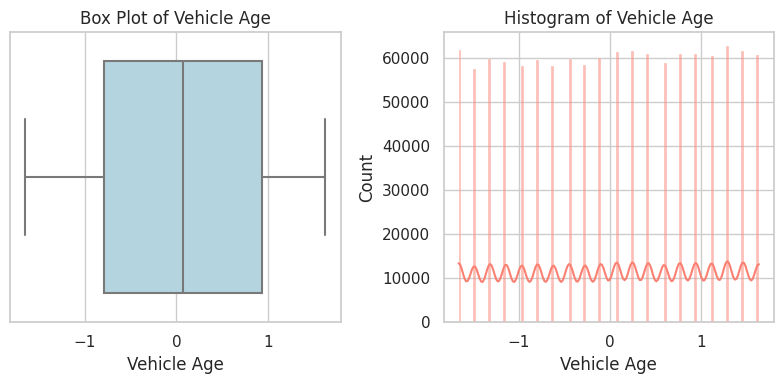

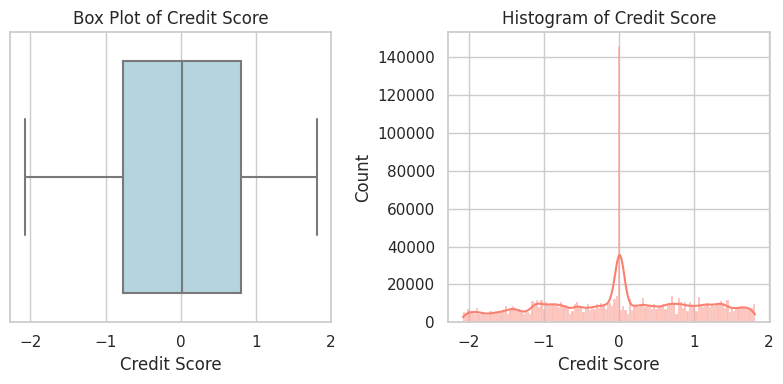

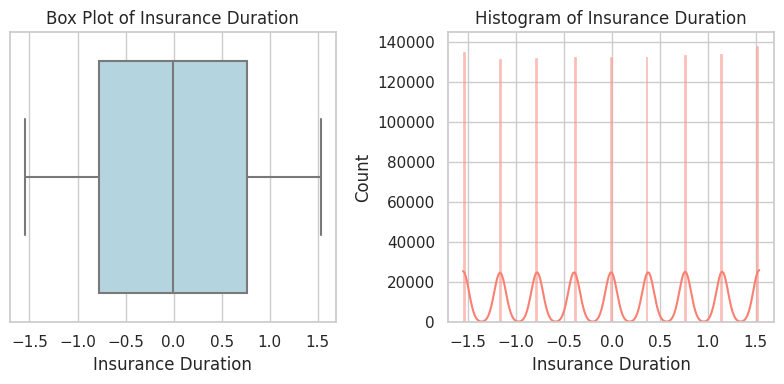

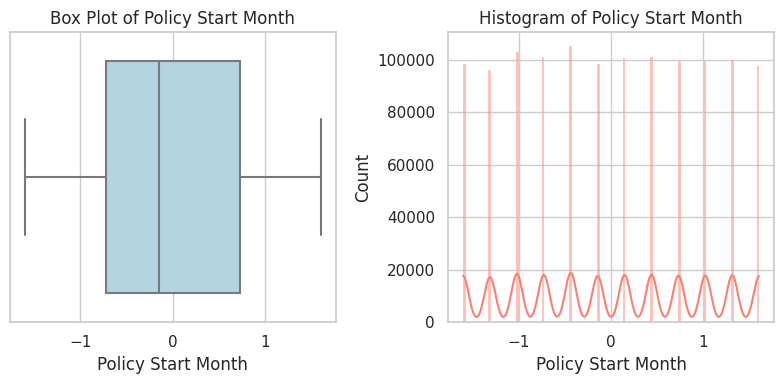

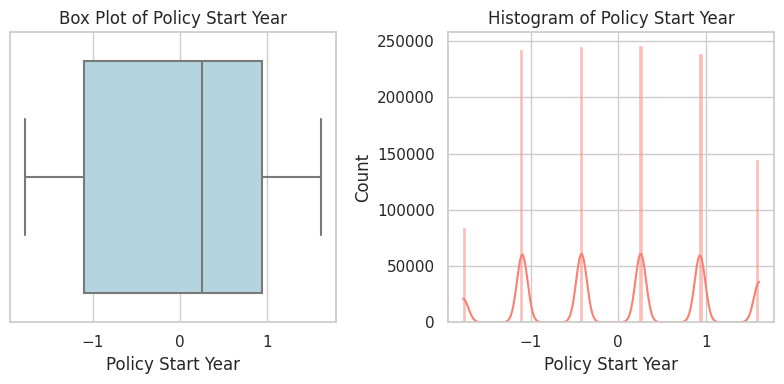

In [20]:
# Set Seaborn style for the plots
sns.set(style="whitegrid")  # Use a clean white grid style for better readability

# Loop through each numerical column to create visualizations
for col in numerical_cols:
    # Create a subplot with 1 row and 2 columns (Box plot and Histogram)
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Create a figure with two subplots

    # Box plot to visualize the distribution and outliers
    sns.boxplot(data=X, x=col, ax=axs[0], color='lightblue')  # Box plot for the column
    axs[0].set_title(f'Box Plot of {col}')  # Title for the box plot

    # Histogram with KDE (Kernel Density Estimation) to visualize the distribution
    sns.histplot(data=X, x=col, kde=True, ax=axs[1], color='salmon')  # Histogram with KDE for the column
    axs[1].set_title(f'Histogram of {col}')  # Title for the histogram

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plots
    plt.show()

In [21]:
# Importing mstats from scipy for winsorization
from scipy.stats import mstats

# Capping the values in 'Annual Income' and 'Previous Claims' at the 1st and 99th percentiles
X['Annual Income'] = mstats.winsorize(X['Annual Income'], limits=[0.10, 0.10])  # Capping at 10th and 90th percentiles
X['Previous Claims'] = mstats.winsorize(X['Previous Claims'], limits=[0.10, 0.10])  # Capping at 10th and 90th percentiles

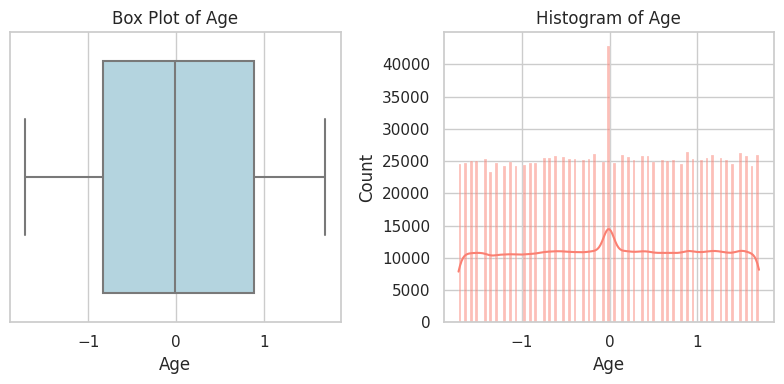

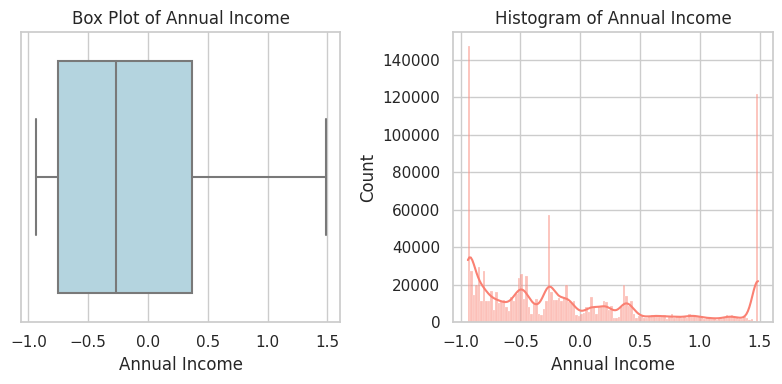

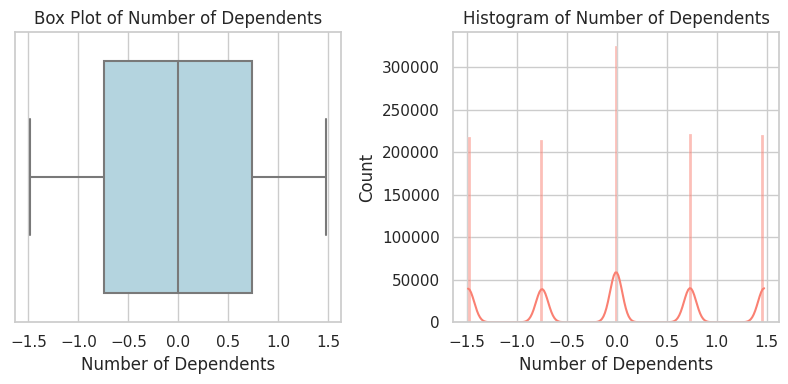

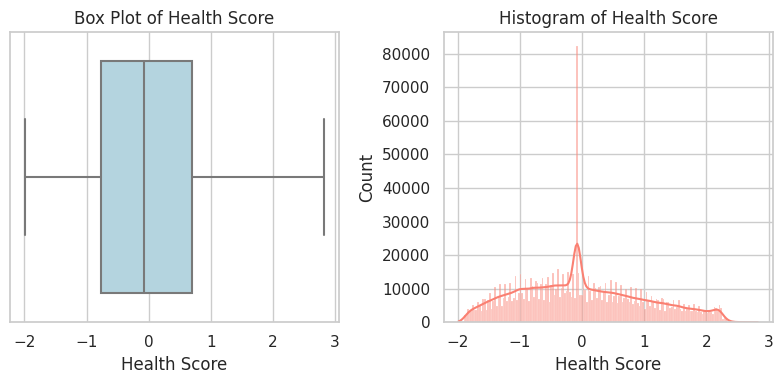

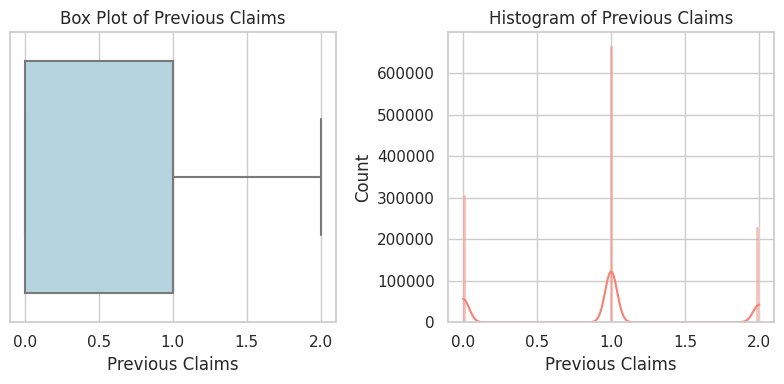

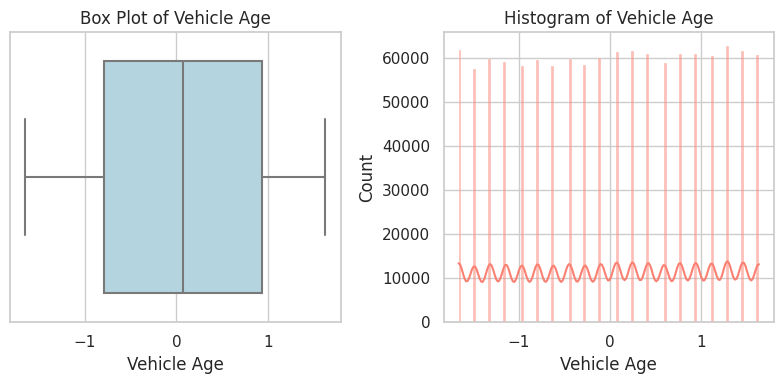

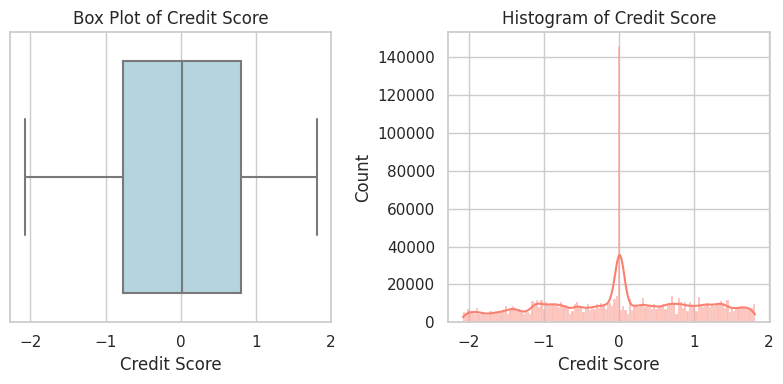

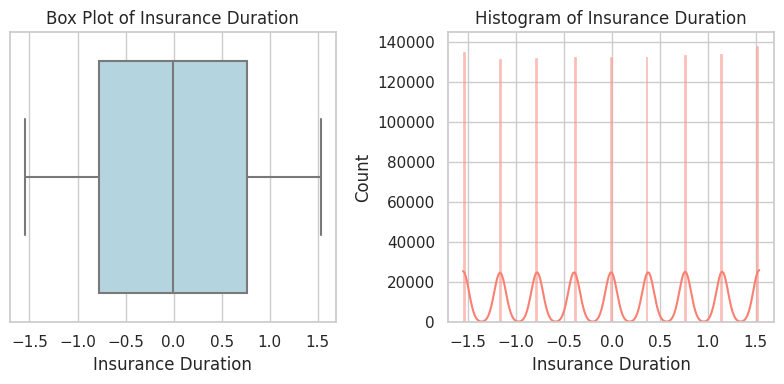

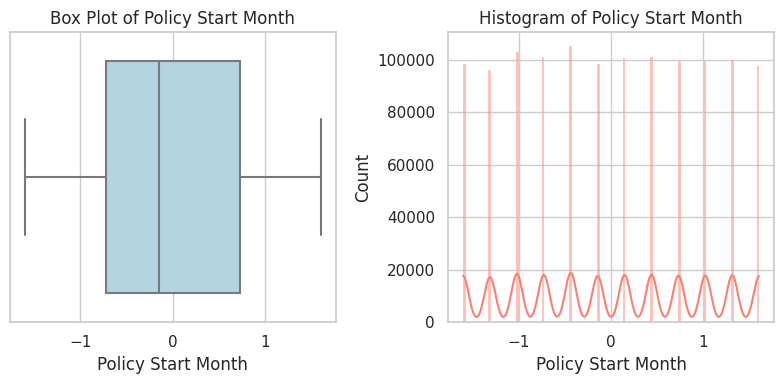

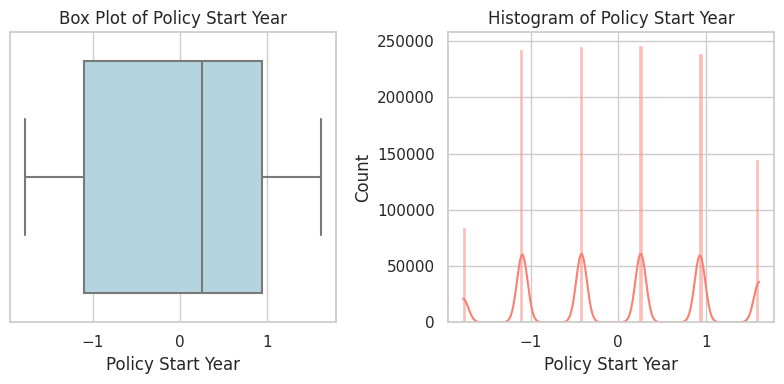

In [56]:
# Set Seaborn style for the plots
sns.set(style="whitegrid")  # Use a clean white grid style for better readability

# Loop through each numerical column to create visualizations
for col in numerical_cols:
    # Create a subplot with 1 row and 2 columns (Box plot and Histogram)
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Create a figure with two subplots

    # Box plot to visualize the distribution and outliers
    sns.boxplot(data=X, x=col, ax=axs[0], color='lightblue')  # Box plot for the column
    axs[0].set_title(f'Box Plot of {col}')  # Title for the box plot

    # Histogram with KDE (Kernel Density Estimation) to visualize the distribution
    sns.histplot(data=X, x=col, kde=True, ax=axs[1], color='salmon')  # Histogram with KDE for the column
    axs[1].set_title(f'Histogram of {col}')  # Title for the histogram

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plots
    plt.show()

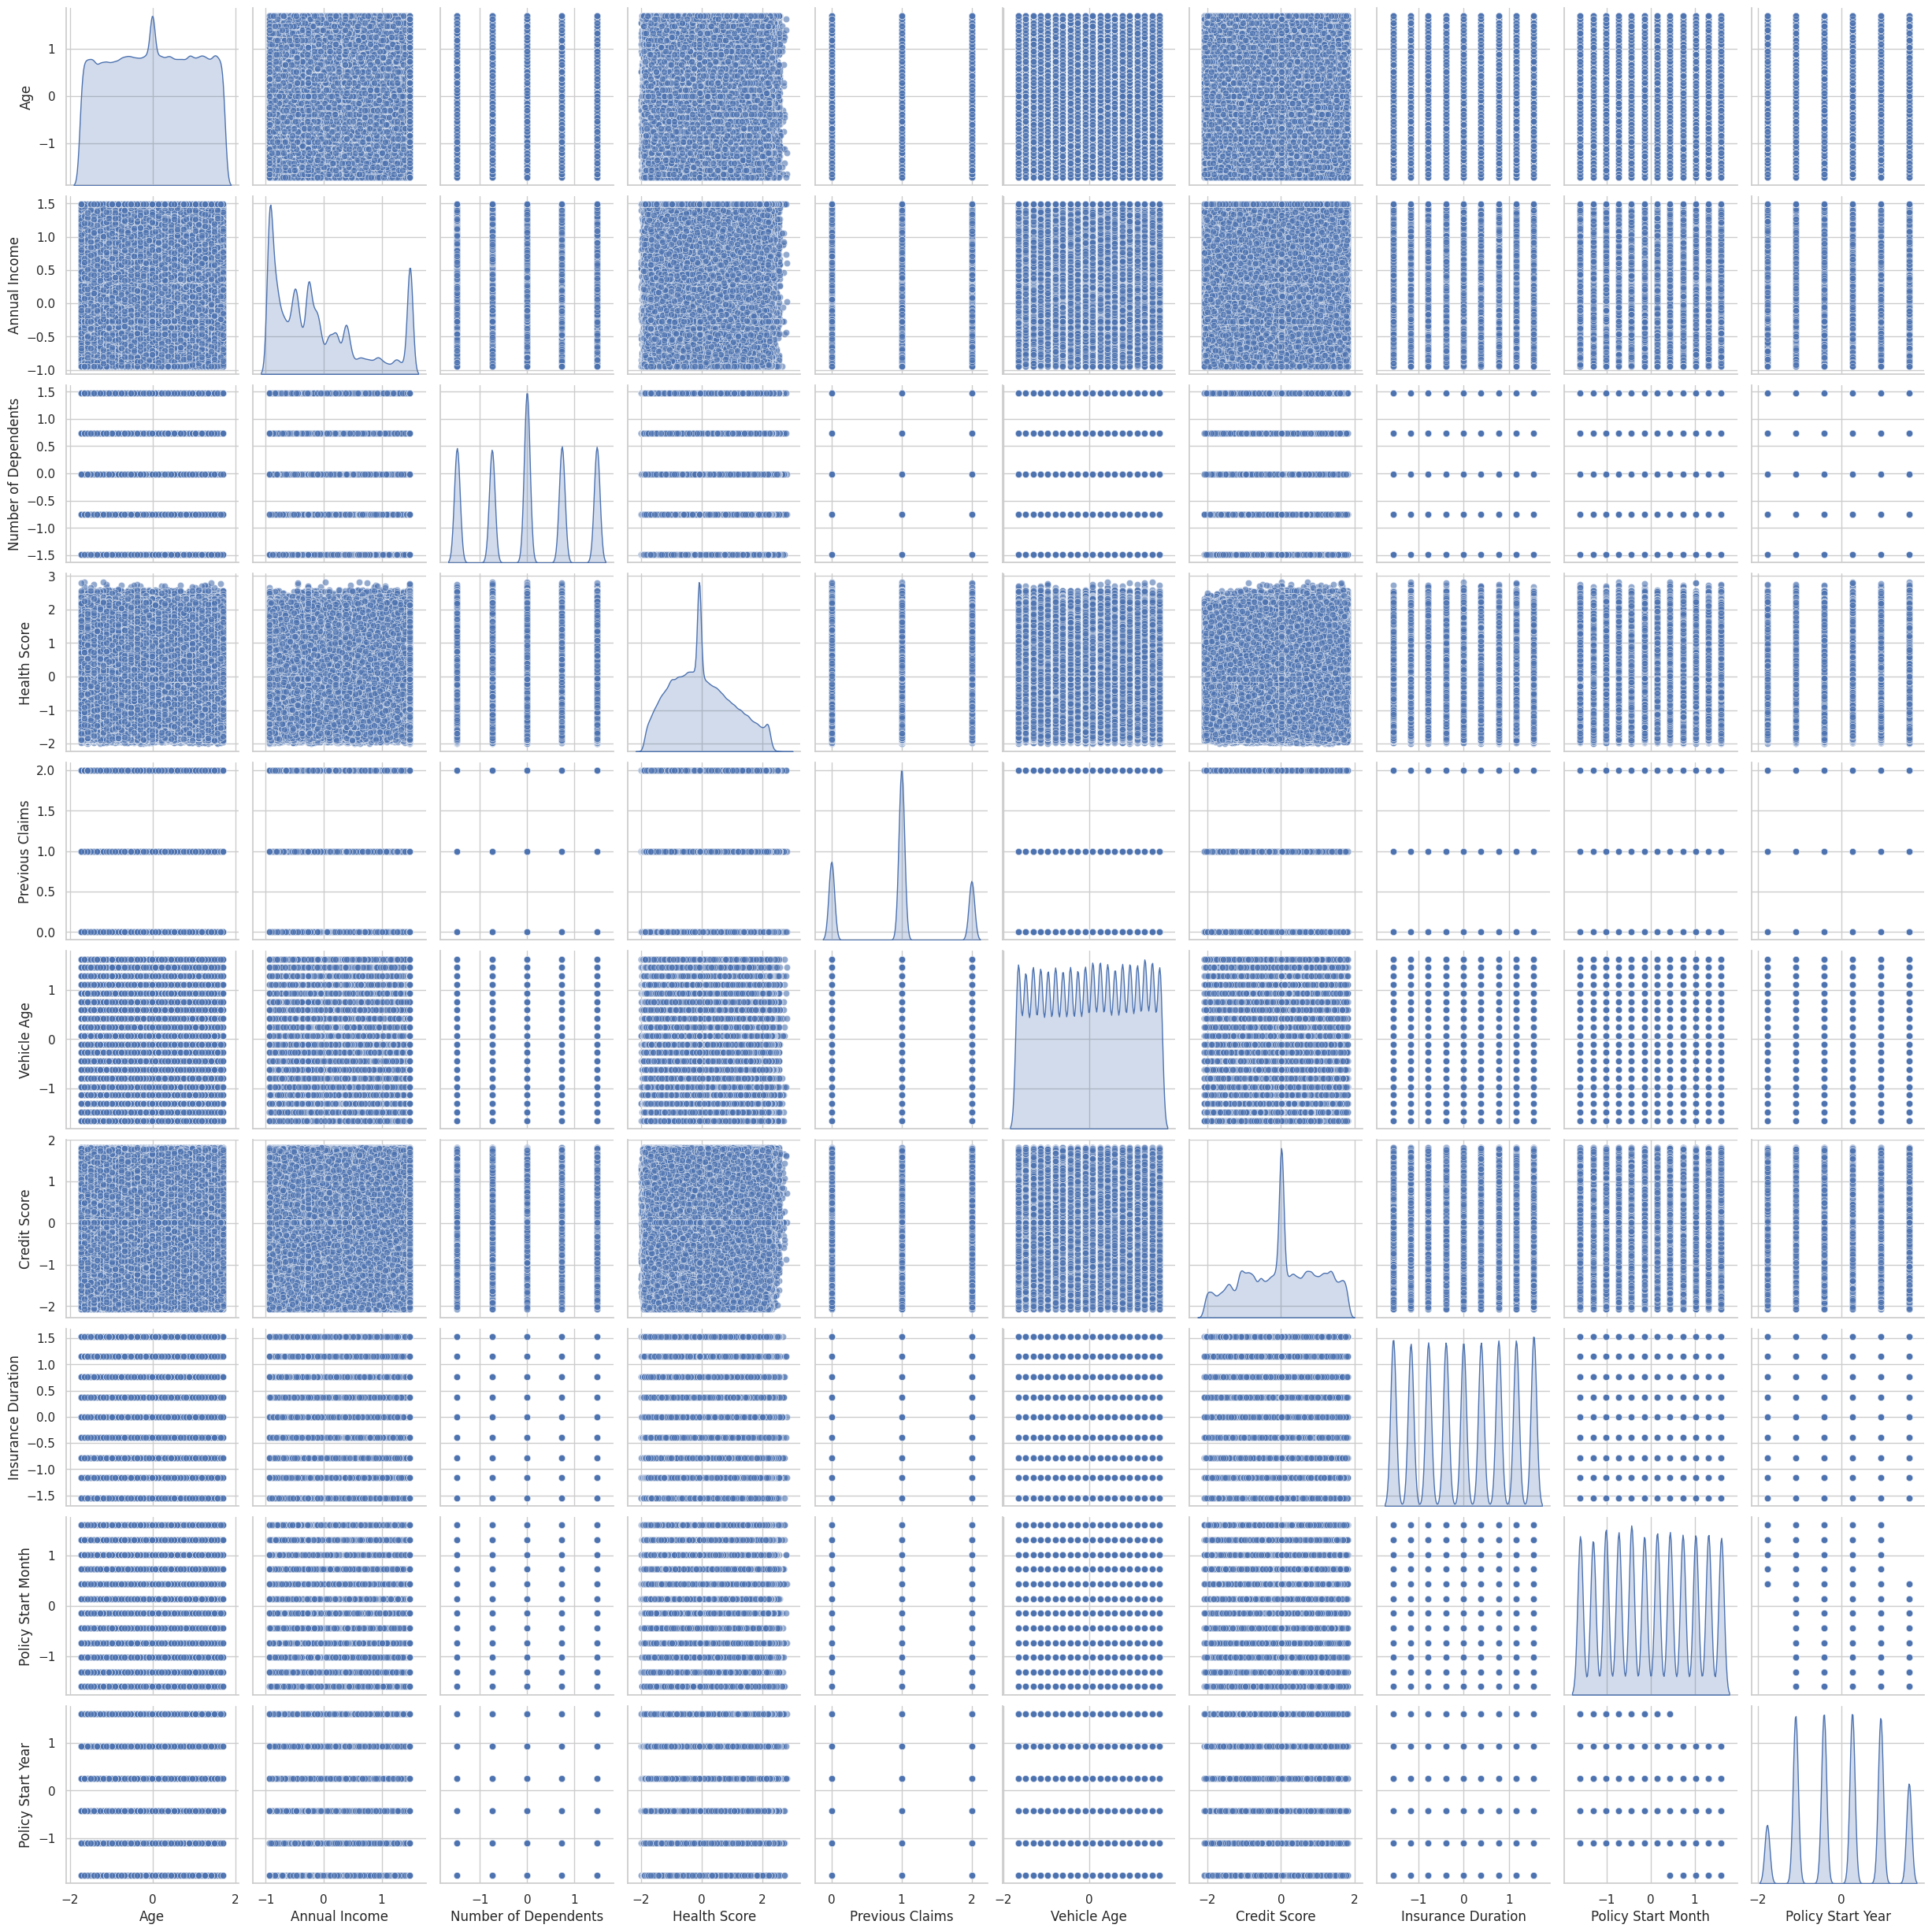

In [57]:
# Pairwise scatter plots between numerical variables, with KDE on the diagonal
sns.pairplot(X[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.6})  # Scatter plots for numerical columns with KDE on diagonal

# Display the pairplot
plt.show()

## Modeling with Feed forward Neural Network (FNN)

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# evaluation, Root Mean Squared Logarithmic Error (RMSLE)
import tensorflow as tf
import tensorflow.keras.backend as K

def rmsle(y_test, y_pred):
    log_diff = tf.math.log(y_pred + 1) - tf.math.log(y_test + 1)
    return tf.sqrt(tf.reduce_mean(tf.square(log_diff)))

In [24]:
# Import necessary libraries for model creation, training, and evaluation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Initialize a sequential model
model = Sequential()

# Add a dense layer with 128 units, ReLU activation, and L2 regularization
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
# Add batch normalization and dropout layers to prevent overfitting
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Add a dense layer with 64 units, ReLU activation, and L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
# Add batch normalization and dropout layers
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add a dense layer with 32 units, ReLU activation, and L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
# Add batch normalization and dropout layers
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Add a dense layer with 16 units and ReLU activation (without regularization)
model.add(Dense(16, activation='relu'))

# Add the output layer with a single unit
model.add(Dense(1))

# Print the summary of the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,017 (54.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
# Compile the model with Adam optimizer and mean squared error loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=[rmsle])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=2, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

Epoch 1/120


I0000 00:00:1734579158.523464     416 service.cc:145] XLA service 0x7b003c004fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734579158.523511     416 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   96/26250 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1932813.1250 - rmsle: nan     

I0000 00:00:1734579162.917688     416 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26250/26250 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 1467301.0000 - rmsle: nan - val_loss: 763924.1875 - val_rmsle: 1.1371 - learning_rate: 1.0000e-04
Epoch 2/120
26250/26250 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 767008.3125 - rmsle: 1.1474 - val_loss: 757726.2500 - val_rmsle: 1.1431 - learning_rate: 1.0000e-04
Epoch 3/120
26250/26250 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 753406.4375 - rmsle: 1.1450 - val_loss: 751252.0625 - val_rmsle: 1.1426 - learning_rate: 1.0000e-04
Epoch 4/120
26250/26250 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - loss: 754530.0625 - rmsle: 1.1436 - val_loss: 749866.3750 - val_rmsle: 1.1398 - learning_rate: 1.0000e-04
Epoch 5/120
26250/26250 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 752825.9375 - rmsle: 1.1465 - val_loss: 747773.9375 - val_rmsle: 1.1425 - learning_rate: 1.0000e-04
Epoch 6/120
26250/26250 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - loss: 746421.7500 - rmsle: 1.1419 - val_loss: 746101.3750 - val_rmsle: 1.1438 - learning_rate: 1.0000e-04
Epoch 7/120
26250/

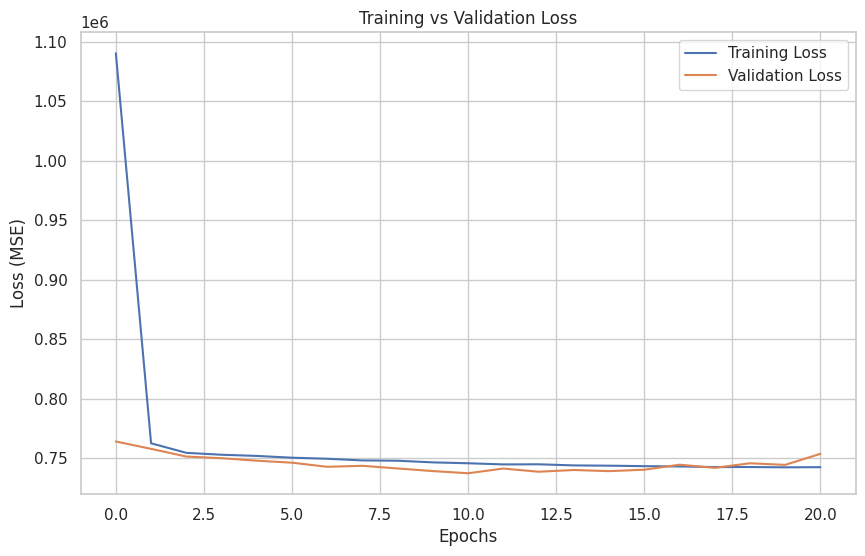

In [26]:
# Plot the training and validation loss to monitor for overfitting
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
print(history.history.keys())

dict_keys(['loss', 'rmsle', 'val_loss', 'val_rmsle', 'learning_rate'])


## Evaluate the model's performance on MSE & RMSLE

In [34]:
# Evaluate the model's performance on the test set and display the test loss
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss (MSE): {test_loss}')

f_rmsle = history.history['rmsle'][-3]
f_v_rmsle = history.history['val_rmsle'][-3]

print(f"Final RMSLE:{f_rmsle}")
print(f"Final validation RMSLE: {f_v_rmsle}")

Test loss (MSE): [737211.25, 1.1381213665008545]
Final RMSLE:1.1395326852798462
Final validation RMSLE: nan


## Save or Load the Model via .h5 (if needed)

In [35]:
# Save the model in HDF5 format
model.save('FNN_model.h5')
print("Model saved as 'FNN_model.h5'.")

Model saved as 'FNN_model.h5'.


In [ ]:
# # Load the Model

# from tensorflow.keras.models import load_model

# # Load the model
# model = load_model('/kaggle/input/fnn-model/other/default/1/model.h5')

# # Check the model summary
# model.summary()

## Preprocessing with test data

In [36]:
def preprocess_test_data(test_data):
    """
    Preprocess the given test dataset.
    
    Parameters:
        test_data (pd.DataFrame): The test dataset without the target variable ('Premium Amount').
        
    Returns:
        ids (pd.Series): Extracted IDs from the dataset.
        cleaned_data (pd.DataFrame): Preprocessed dataset ready for model prediction.
    """
    # Extract 'id' column
    ids = test_data['id']
    
    # Drop 'id' column
    test_data.drop(columns=['id'], inplace=True)
    
    # Handling missing values
    test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
    test_data['Annual Income'].fillna(test_data['Annual Income'].median(), inplace=True)
    test_data['Marital Status'].fillna('Unknown', inplace=True)
    test_data['Number of Dependents'].fillna(test_data['Number of Dependents'].median(), inplace=True)
    test_data['Occupation'].fillna('Unknown', inplace=True)
    test_data['Health Score'].fillna(test_data['Health Score'].median(), inplace=True)
    test_data['Previous Claims'].fillna(test_data['Previous Claims'].median(), inplace=True)
    test_data['Vehicle Age'].fillna(test_data['Vehicle Age'].median(), inplace=True)
    test_data['Credit Score'].fillna(test_data['Credit Score'].median(), inplace=True)
    test_data['Customer Feedback'].fillna(test_data['Customer Feedback'].mode()[0], inplace=True)
    test_data['Insurance Duration'].fillna(test_data['Insurance Duration'].mode()[0], inplace=True)

    # Label encoding for categorical columns
    label_encoder = LabelEncoder()
    columns_to_encode = [
        'Gender', 'Marital Status', 'Education Level', 'Occupation',
        'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status',
        'Exercise Frequency', 'Property Type'
    ]
    for column in columns_to_encode:
        if column in test_data.columns:
            test_data[column] = label_encoder.fit_transform(test_data[column].astype(str))

    # Date processing for 'Policy Start Date'
    if 'Policy Start Date' in test_data.columns:
        test_data['Policy Start Date'] = pd.to_datetime(test_data['Policy Start Date'], errors='coerce')
        test_data['Policy Start Year'] = test_data['Policy Start Date'].dt.year
        test_data['Policy Start Month'] = test_data['Policy Start Date'].dt.month
        test_data.drop(columns=['Policy Start Date'], inplace=True)
        
    # Standardization for numerical columns
    scaler = StandardScaler()
    columns_to_scale = [
        'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
        'Vehicle Age', 'Credit Score', 'Insurance Duration',
        'Policy Start Year', 'Policy Start Month'
    ]
    test_data[columns_to_scale] = scaler.fit_transform(test_data[columns_to_scale])

    # Winsorization for specific columns
    if 'Annual Income' in test_data.columns:
        test_data['Annual Income'] = mstats.winsorize(test_data['Annual Income'], limits=[0.10, 0.10])
    if 'Previous Claims' in test_data.columns:
        test_data['Previous Claims'] = mstats.winsorize(test_data['Previous Claims'], limits=[0.10, 0.10])


    return ids, test_data

## View Sample Submission

In [37]:
sample_data = pd.read_csv('/kaggle/input/playground-series-s4e12/sample_submission.csv')
sample_data.head()

id  Premium Amount
0  1200000        1102.545
1  1200001        1102.545
2  1200002        1102.545
3  1200003        1102.545
4  1200004        1102.545

## Importing & Cleaning test_data

In [38]:
test = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv')
test.head()

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              NaN         19.0           NaN                 1.0   
1              NaN         14.0         372.0                 8.0   
2              NaN         16.0         819.0                 9.0   
3              1.0          3.0         770.0                 5.0   
4              NaN         14.0         755.0                 7.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-06-04 15:21:39.245086              Poor            Yes   
1  2024-04-22 15:21:39.224915              Good            Yes   
2  2023-04-05 15:21:39.134960           Average            Yes   
3  2023-10-25 15:21:39.134960              Poor            Yes   
4  2021-11-26 15:21:39.259788           Average             No   

  Exercise Frequency Property Type  
0             Weekly         House  
1             Rarely     Apartment  
2            Monthly         Condo  
3              Daily         House  
4             Weekly         House

## View Test Data

In [39]:
id, test_data = preprocess_test_data(test)
test_data.head()

Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0 -0.977856       0      -0.941146               3              1.476282   
1 -0.754504       0       1.497867               1             -0.006289   
2  0.436704       0      -0.486196               0             -1.488860   
3 -0.977856       0      -0.064812               0              0.734997   
4 -1.275658       1      -0.683075               0             -0.006289   

   Education Level  Occupation  Health Score  Location  Policy Type  \
0                0           1     -1.512844         0            0   
1                2           1     -1.028885         1            2   
2                3           2     -0.101018         2            1   
3                3           1     -1.726078         1            1   
4                1           2     -1.158870         1            2   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              1.0     1.633369      0.013135           -1.549471   
1              1.0     0.767146     -1.565320            1.149312   
2              1.0     1.113635      1.598669            1.534852   
3              1.0    -1.138545      1.251834           -0.007309   
4              1.0     0.767146      1.145659            0.763772   

   Customer Feedback  Smoking Status  Exercise Frequency  Property Type  \
0                  2               1                   3              2   
1                  1               1                   2              0   
2                  0               1                   1              1   
3                  2               1                   0              2   
4                  0               0                   3              2   

   Policy Start Year  Policy Start Month  
0           0.933801           -0.143024  
1           1.611028           -0.725862  
2           0.933801           -0.725862  
3           0.933801            1.022654  
4          -0.420653            1.314073

In [40]:
print(test_data.isnull().sum())
print(test_data.shape)
print(id.shape)

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Policy Start Year       0
Policy Start Month      0
dtype: int64
(800000, 20)
(800000,)


## Predict test_data

In [41]:
# Make predictions on the test set
y_pred = model.predict(test_data)

25000/25000 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step


## Combine Predicted values for test_data with IDs

In [55]:
y_pred = y_pred.reshape(-1)

# Create a DataFrame to store the ' Id' and corresponding 'Premium Amount' predictions
output = pd.DataFrame({'id': id, 'Premium Amount': y_pred})

# Save the predictions to a CSV file for submission
output.to_csv('submission.csv', index=False)

print("Submission was successfully saved!")

Submission was successfully saved!


# * **Thank you for taking time to read my Kaggle notebook!**
I truly appreciate any feedback you may have and am always open to engaging in thoughtful discussions. Your insights and suggestions are invaluable to me, and I welcome any comments or ideas you’d like to share. Whether it's a question, critique, or additional perspective, feel free to reach out—I’m eager to learn and improve!